In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
import seaborn as sns
%matplotlib inline

/home/ghristov/miniconda3/envs/mlp/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Observed AUC')
    ax.set_ylabel('Predicted AUC')
    ax.set_title('')

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'features.csv')
data_path_rp = os.path.join(os.getcwd(), 'datasets', 'rp_features.csv')
data_path_nrp = os.path.join(os.getcwd(), 'datasets', 'nrp_features.csv')
data_path_extended = os.path.join(os.getcwd(), 'datasets', 'extended_features.csv')

gene_features = pd.read_csv(data_path, delimiter = ',')
rp_gene_features = pd.read_csv(data_path_rp, delimiter = ',')
nrp_gene_features = pd.read_csv(data_path_nrp, delimiter = ',')
extended_features = pd.read_csv(data_path_extended, delimiter = ',')

print('Number of data points: {}. Number of attributes: {}'.format(gene_features.shape[0],gene_features.shape[1]))
print('Number of data points: {}. Number of attributes: {}'.format(extended_features.shape[0],extended_features.shape[1]))

Number of data points: 117. Number of attributes: 101
Number of data points: 117. Number of attributes: 107


In [3]:
X = gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y = gene_features['AUC']


X_rp = rp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y_rp = rp_gene_features['AUC']

X_nrp = nrp_gene_features.drop(['ORG', 'Gene','AUC'], axis=1)
y_nrp = nrp_gene_features['AUC']

X_extended = extended_features.drop(['ORG', 'Gene','AUC'], axis=1)
y_extended = extended_features['AUC']

In [9]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

In [11]:
lr1 = LinearRegression()
lr2 = LinearRegression()

predictions1 = cross_val_predict(lr1,X,y=y,cv=kf)
predictions2 = cross_val_predict(lr1,X_extended,y=y_extended,cv=kf)

print('Data')
print('Coefficient of determination: {}'.format(r2_score(y, predictions1)))
print('Mean absolute error: {}'.format(mean_absolute_error(y, predictions1)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions1))))
print('\n')
print('Extended Data')
print('Coefficient of determination: {}'.format(r2_score(y, predictions2)))
print('Mean absolute error: {}'.format(mean_absolute_error(y, predictions2)))
print('Root mean squared error: {}'.format(np.sqrt(mean_squared_error(y, predictions2))))

Data
Coefficient of determination: -7.218302015333855
Mean absolute error: 0.4702581683241454
Root mean squared error: 0.6546933285937646


Extended Data
Coefficient of determination: -3.3354838774388638
Mean absolute error: 0.3297615508995484
Root mean squared error: 0.47551656947204896


In [12]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

rfr1 = RandomForestRegressor()
rfr2 = RandomForestRegressor()

predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X_extended,y=y_extended,cv=kf)

print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr1)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr1)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr1))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr1)))
print('\n')
print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr2)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr2)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr2))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr2)))

RandomForestRegressor R^2: 0.16232932385852494
RandomForestRegressor MAE: 0.15291120607787276
RandomForestRegressor RMSE: 0.2090179207344186
RandomForestRegressor CC: 
[[ 1.          0.44877645]
 [ 0.44877645  1.        ]]


RandomForestRegressor R^2: 0.262252072254323
RandomForestRegressor MAE: 0.1407094017094017
RandomForestRegressor RMSE: 0.19615566990940345
RandomForestRegressor CC: 
[[ 1.          0.52250913]
 [ 0.52250913  1.        ]]


Data
RandomForestRegressor R^2: 0.2858152454192372
RandomForestRegressor MAE: 0.14049829059829058
RandomForestRegressor RMSE: 0.19299770934383081
RandomForestRegressor CC: 
[[ 1.          0.54099926]
 [ 0.54099926  1.        ]]


Extended
RandomForestRegressor R^2: 0.2939252089841087
RandomForestRegressor MAE: 0.13987094017094015
RandomForestRegressor RMSE: 0.1918987827489086
RandomForestRegressor CC: 
[[ 1.         0.5445831]
 [ 0.5445831  1.       ]]


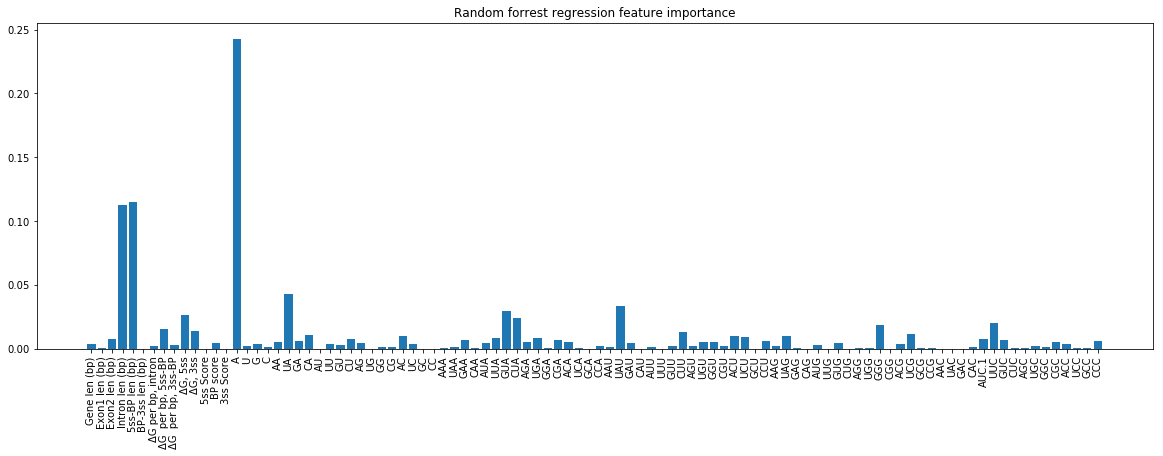

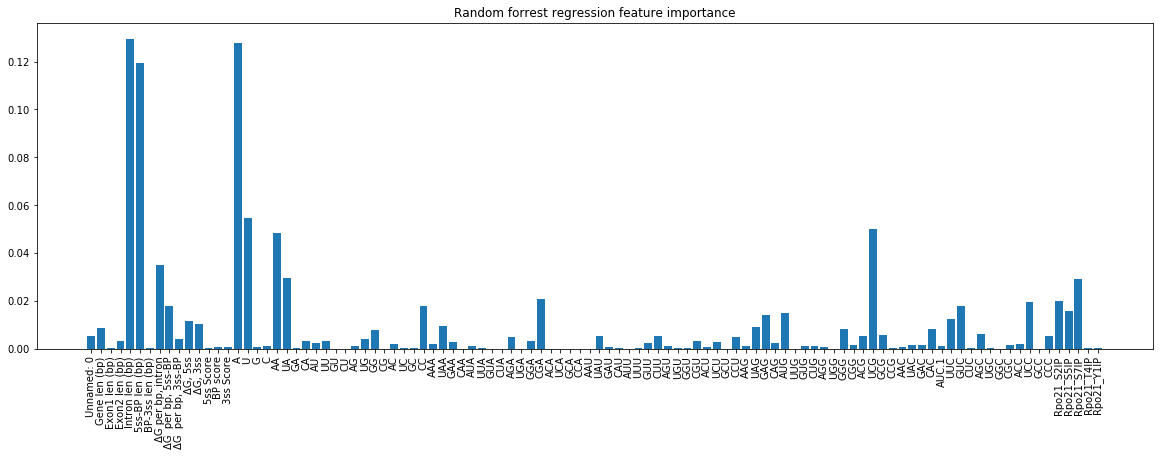

In [19]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

rfr1 = RandomForestRegressor()
rfr2 = RandomForestRegressor()

predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X_extended,y=y_extended,cv=kf)

print('Data')
print('RandomForestRegressor R^2: {}'.format(r2_score(y, predictions_rfr1)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y, predictions_rfr1)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr1))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y, predictions_rfr1)))

rfr1.fit(X,y)
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr1.feature_importances_))
ax1.bar(xx, rfr1.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

print('\n')
print('Extended')
print('RandomForestRegressor R^2: {}'.format(r2_score(y_extended, predictions_rfr2)))
print('RandomForestRegressor MAE: {}'.format(mean_absolute_error(y_extended, predictions_rfr2)))
print('RandomForestRegressor RMSE: {}'.format(np.sqrt(mean_squared_error(y_extended, predictions_rfr2))))
print('RandomForestRegressor CC: \n{}'.format(np.corrcoef(y_extended, predictions_rfr2)))

rfr2.fit(X_extended,y_extended)
fig2, ax2 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr2.feature_importances_))
ax2.bar(xx, rfr2.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forrest regression feature importance')

Normal feature space
Coefficient of determination R^2: 0.353344745806776
Mean squared error:               0.03372613269061539
Mean absolute error:              0.13250955555555552
Root mean squared error:          0.1836467606319681
Correlation Coefficient:          0.5972983280622174


Extended feature space
Coefficient of determination R^2: 0.41608857506293984
Mean squared error:               0.03045374497352991
Mean absolute error:              0.12733541025641024
Root mean squared error:          0.17451001396346832
Correlation Coefficient:          0.6538661778284606


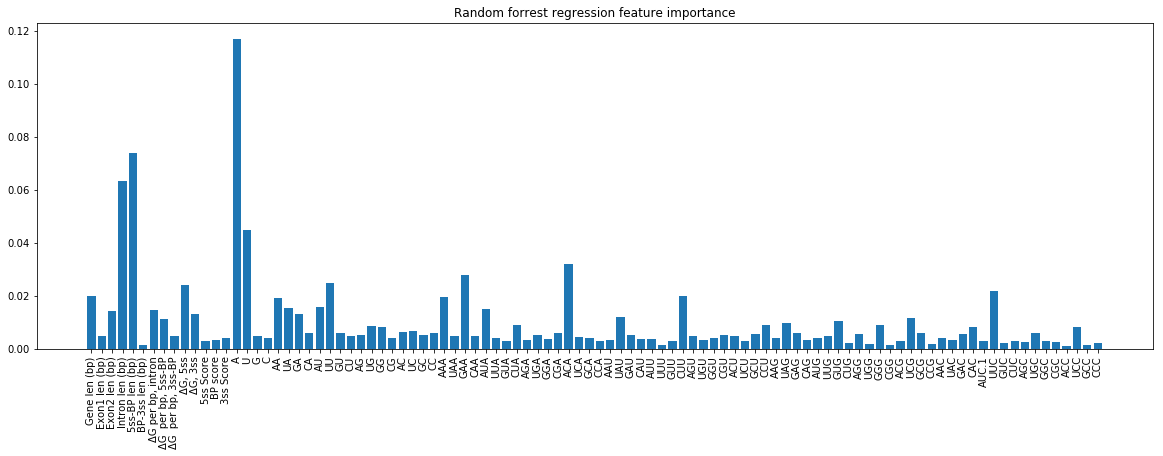

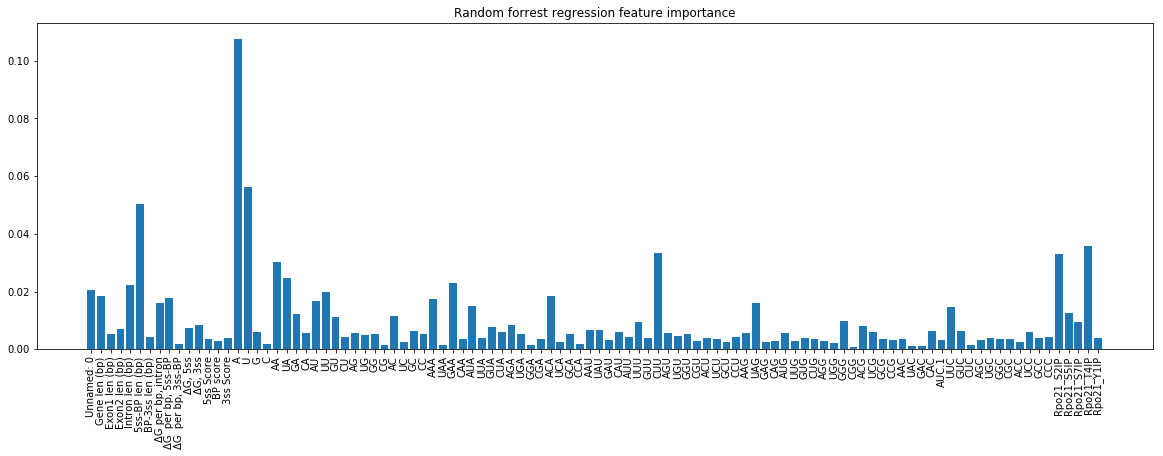

In [41]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

rfr1 = RandomForestRegressor(n_estimators=100, 
                            criterion='mse', 
                            max_features=25, 
                            max_depth=20, 
                            n_jobs=2,
                            random_state=1337)

rfr2 = RandomForestRegressor(n_estimators=100, 
                            criterion='mse', 
                            max_features=25, 
                            max_depth=20, 
                            n_jobs=2,
                            random_state=1337)

predictions_rfr1 = cross_val_predict(rfr1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(rfr2,X_extended,y=y_extended,cv=kf)

print('Normal feature space')
print('Coefficient of determination R^2: {}'.format(r2_score(y, predictions_rfr1)))
print('Mean squared error:               {}'.format(mean_squared_error(y, predictions_rfr1)))
print('Mean absolute error:              {}'.format(mean_absolute_error(y, predictions_rfr1)))
print('Root mean squared error:          {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr1))))
print('Correlation Coefficient:          {}'.format(np.corrcoef(y, predictions_rfr1)[0][1]))

rfr1.fit(X,y)
fig, ax1 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr1.feature_importances_))
ax1.bar(xx, rfr1.feature_importances_)
ax1.set_xticks(xx)
ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax1.set_title('Random forrest regression feature importance')

print('\n')
print('Extended feature space')
print('Coefficient of determination R^2: {}'.format(r2_score(y, predictions_rfr2)))
print('Mean squared error:               {}'.format(mean_squared_error(y, predictions_rfr2)))
print('Mean absolute error:              {}'.format(mean_absolute_error(y, predictions_rfr2)))
print('Root mean squared error:          {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr2))))
print('Correlation Coefficient:          {}'.format(np.corrcoef(y, predictions_rfr2)[0][1]))

rfr2.fit(X_extended,y_extended)
fig2, ax2 = plt.subplots(figsize=(20,6))
xx = np.arange(len(rfr2.feature_importances_))
ax2.bar(xx, rfr2.feature_importances_)
ax2.set_xticks(xx)
ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
ax2.set_title('Random forrest regression feature importance')

In [4]:
# data_pca = pca.transform(data)
# y_true = digits.target

kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

svc_score_array = np.zeros((5,1));
svc_pca_score_array = np.zeros((5,1));
gaus_score_array = np.zeros((5,1));
gaus_pca_score_array = np.zeros((5,1));

i = 0;
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    X_train_pca, X_test_pca = X_extended[train_index], X_extended[test_index]
    
    y_train, y_test = y[train_index], y[test_index]

    svc_lin = SVC(kernel='linear',shrinking=False,random_state=1337)
    svc_lin.fit(X_train, y_train)

    svc_lin_pca = SVC(kernel='linear',shrinking=False,random_state=1337)
    svc_lin_pca.fit(X_train_pca, y_train)

    gaus = GaussianNB()
    gaus.fit(X_train,y_train)

    gaus_pca = GaussianNB()
    gaus_pca.fit(X_train_pca,y_train)


    svc_score_array[i] = svc_lin.score(X_test, y_test)
    svc_pca_score_array[i] = svc_lin_pca.score(X_test_pca, y_test)
    gaus_score_array[i] = gaus.score(X_test, y_test)
    gaus_pca_score_array[i] = gaus_pca.score(X_test_pca, y_test)

    i = i + 1;
    
svc_mean_performance = svc_score_array.mean(axis=0);
svc_pca_mean_performance = svc_pca_score_array.mean(axis=0);
gaus_mean_performance = gaus_score_array.mean(axis=0);
gaus_pca_mean_performance = gaus_pca_score_array.mean(axis=0);

print("Mean accuracy of SVC on digit data: {}".format(svc_mean_performance[0]))
print("Mean accuracy of SVC on pca transformed digit data: {}".format(svc_pca_mean_performance[0]))
print("Mean accuracy of SVC on digit data: {}".format(gaus_mean_performance[0]))
print("Mean accuracy of SVC on pca transformed digit data: {}".format(gaus_pca_mean_performance[0]))

KeyError: '[  2   7  10  13  16  22  24  26  43  50  59  61  62  73  74  86  91  93\n  94  95 101 108 112 116] not in index'

In [ ]:
kf = KFold(X.shape[0],n_folds=5,shuffle=True,random_state=0)

svc1 = SVR(kernel='linear',shrinking=False)
svc2 = SVR(kernel='linear',shrinking=False)

predictions_rfr1 = cross_val_predict(svc1,X,y=y,cv=kf)
predictions_rfr2 = cross_val_predict(svc2,X_extended,y=y_extended,cv=kf)

print('Normal feature space')
print('Coefficient of determination R^2: {}'.format(r2_score(y, predictions_rfr1)))
print('Mean squared error:               {}'.format(mean_squared_error(y, predictions_rfr1)))
print('Mean absolute error:              {}'.format(mean_absolute_error(y, predictions_rfr1)))
print('Root mean squared error:          {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr1))))
print('Correlation Coefficient:          {}'.format(np.corrcoef(y, predictions_rfr1)[0][1]))

# rfr1.fit(X,y)
# fig, ax1 = plt.subplots(figsize=(20,6))
# xx = np.arange(len(rfr1.feature_importances_))
# ax1.bar(xx, rfr1.feature_importances_)
# ax1.set_xticks(xx)
# ax1.set_xticklabels(gene_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
# ax1.set_title('Random forrest regression feature importance')

print('\n')
print('Extended feature space')
print('Coefficient of determination R^2: {}'.format(r2_score(y, predictions_rfr2)))
print('Mean squared error:               {}'.format(mean_squared_error(y, predictions_rfr2)))
print('Mean absolute error:              {}'.format(mean_absolute_error(y, predictions_rfr2)))
print('Root mean squared error:          {}'.format(np.sqrt(mean_squared_error(y, predictions_rfr2))))
print('Correlation Coefficient:          {}'.format(np.corrcoef(y, predictions_rfr2)[0][1]))

# rfr2.fit(X_extended,y_extended)
# fig2, ax2 = plt.subplots(figsize=(20,6))
# xx = np.arange(len(rfr2.feature_importances_))
# ax2.bar(xx, rfr2.feature_importances_)
# ax2.set_xticks(xx)
# ax2.set_xticklabels(extended_features.drop(['ORG','Gene','AUC'], axis=1).columns, rotation='vertical')
# ax2.set_title('Random forrest regression feature importance')